# Data Storytelling
## Steps and Summary:
This analysis is done on a sample dataset of accidents in 48states and D.C. in the period **Feb 2016** till **Dec2019**.<br>

1) load *fillna csv file and check proportion of Severity in dataset.<br>
Severities '2' and '3' represent most of the dataset at 67% and 29.7% respectively.<br>
82% of the accidents were on the Right side of the road and 18% on the left.<br>

2) Map of distribution of accidents by severity in the US.<br>
the majority of the accidents are on the East and West coast of the US.<br>

)) Total number of accidents by Day of the Week:<br>
Most accidents are on Tuesdays and the least on the weekend. However, the most Severe occur on Fridays.<br>

3) Total accidents graph, by weather condition, Day/Night, Day_of_week, Hour_of_day, city and state.<br>
There are 97 different weather conditions in the dataset, the top 10 were graphed. Most accidents occur on Clear days, followed by Partly Cloudy and Overcast days.<br>
Nights seem to be the time when less accidents happen, as do Saturdays and Sundays.<br>

7am and 8am , are the times of the day with the most accidents recorded, followed by 4pm and 5pm. These represent the morning and evening rush hours.<br>

4) States and cities with the highest number of Severest accidents.<br>
California and Texas are the two states with the highest number of accidents, however Florida and Georgia are the states with the severest accidents while California is number 3. Miami and Atlanta are the cities where the severest road accidents happen in the US.
As far as total number of accidents go, Houston takes the prize, followed by Charlotte and Los Angeles.<br>

5) Pairplots 1 and 2 show that level4 Severity is not seen at high Visibility, high Wind_Speed nor high Precipitation

6) Plotting the yearly and monthly counts of road accidents highlights:<br>
> - There has been an increasing trend in total accidents, and
>- There is a jump in the total number of accidents around the 3rd Quarter of 2017.<br>

7) Traffic_Signals are the site for most accidents, followed by Crossings and Junctions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as datetime
import gc

pd.set_option('display.max_columns', 999)

%matplotlib inline

In [2]:
# read in dataset
#na = pd.read_csv('dec19_400k_rs1_edt_fillna.csv')
na = pd.read_csv('dec19_400k_rs1_edt_fillna.csv', parse_dates=['Start_Time', 'End_Time', 'Weather_Timestamp'])

In [3]:
na.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'ID', 'Source', 'TMC',
       'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Day_of_Week', 'Hour_of_Day',
       'Precipitation_wasnull', 'Wind_Chill_wasnull', 'Wind_Speed_wasnull',
       'Visibility_wasnull', 'Humidity_wasnull', 'Temperature_wasnull',
       'Pressure_wasnul

In [4]:
na.shape

(400000, 68)

In [5]:
na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 68 columns):
Unnamed: 0                     400000 non-null int64
Unnamed: 0.1                   400000 non-null int64
Unnamed: 0.1.1                 400000 non-null int64
ID                             400000 non-null object
Source                         400000 non-null object
TMC                            301701 non-null float64
Severity                       400000 non-null int64
Start_Time                     400000 non-null datetime64[ns]
End_Time                       400000 non-null datetime64[ns]
Start_Lat                      400000 non-null float64
Start_Lng                      400000 non-null float64
End_Lat                        98299 non-null float64
End_Lng                        98299 non-null float64
Distance(mi)                   400000 non-null float64
Description                    400000 non-null object
Number                         141503 non-null float64
Street  

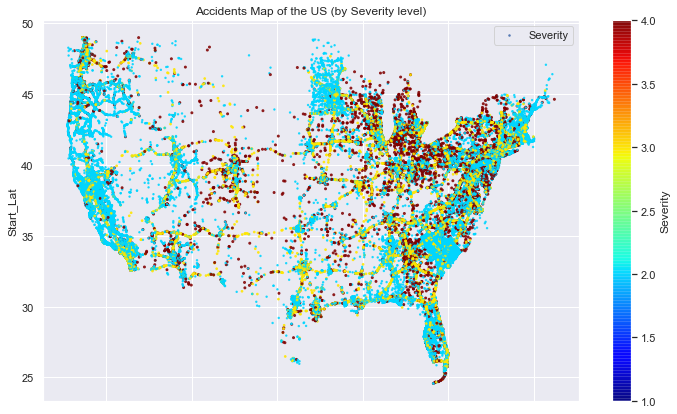

In [62]:
# Map of Severity of Accidents in the US
na.plot(kind='scatter', x='Start_Lng', y='Start_Lat', alpha=0.8, label='Severity',
         s=na['Severity'],
            c='Severity', cmap=plt.get_cmap('jet'), colorbar=True, figsize=(12,7))
plt.title('Accidents Map of the US (by Severity level)')
plt.legend()


In [7]:
# Which side of the road do most accidents occur?
na['Side'].value_counts(normalize=True)

R    0.820823
L    0.179177
Name: Side, dtype: float64

In [8]:
# List by fraction of severity
print(na['Severity'].value_counts(normalize=False).sort_values().to_frame())
print(na['Severity'].value_counts(normalize=True).sort_values().to_frame())

   Severity
1       115
4     12496
3    119180
2    268209
   Severity
1  0.000287
4  0.031240
3  0.297950
2  0.670523


In [9]:
#sns.countplot(x='Severity', data=na, title='Count by Severity Value')
all = na.groupby('Day_of_Week')['Severity'].value_counts().unstack(level=1)
all.head(3)

Severity,1,2,3,4
Day_of_Week,,,,
0,18,47674,18864,1983
1,19,51158,20115,1981
2,18,50111,19999,1983


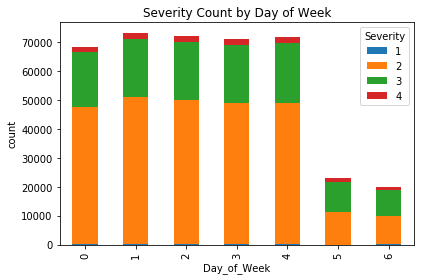

In [10]:
all.plot(kind="bar", stacked=True, figsize=(6, 4))
plt.legend(title='Severity')
plt.ylabel("count")
#plt.yticks(np.arange(0, 20, 2.0))
plt.title('Severity Count by Day of Week')
plt.tight_layout()
#plt.savefig(figure_folder + 'Severity_by_day_of_Week.png');

#del store_plot; gc.collect()

In [33]:
# Day of Week from numbers to name(string)
na['Day_of_Week'] = na['Start_Time'].dt.weekday_name

In [34]:
# subset dataframe with Severity = 4
na_severity_4 = na[na['Severity'] == 4]
Four = na_severity_4.groupby('Day_of_Week')['Severity'].value_counts().unstack(level=1)
Four

Severity,4
Day_of_Week,
Friday,2011
Monday,1983
Saturday,1368
Sunday,1271
Thursday,1899
Tuesday,1981
Wednesday,1983


Text(0.5, 1.0, 'Most Severe Accidents Count by Day of Week')

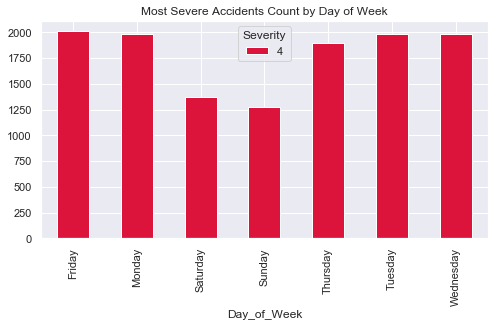

In [46]:
Four.plot(kind="bar", color='crimson',stacked=True, figsize=(8, 4))
plt.title('Most Severe Accidents Count by Day of Week')

In [37]:
# subset dataframe with Severity = 1
# Which days of the week have the least severe accidents

na_severity_1 = na[na['Severity'] == 1]
One = na_severity_1.groupby('Day_of_Week')['Severity'].value_counts().unstack(level=1)
One

Severity,1
Day_of_Week,
Friday,23
Monday,18
Saturday,6
Sunday,12
Thursday,19
Tuesday,19
Wednesday,18


Text(0.5, 1.0, 'Least Severe Accidents Count by Day of Week')

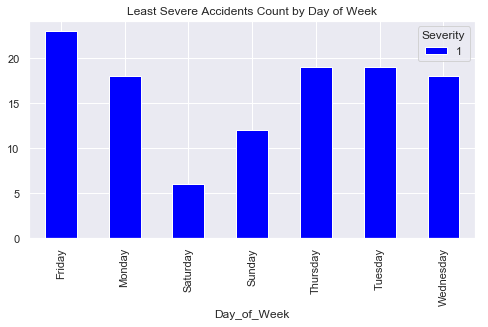

In [45]:
One.plot(kind="bar", color='blue',stacked=True, figsize=(8, 4))
plt.title('Least Severe Accidents Count by Day of Week')

Text(0.5, 1.0, 'Severity Count by Day & Night')

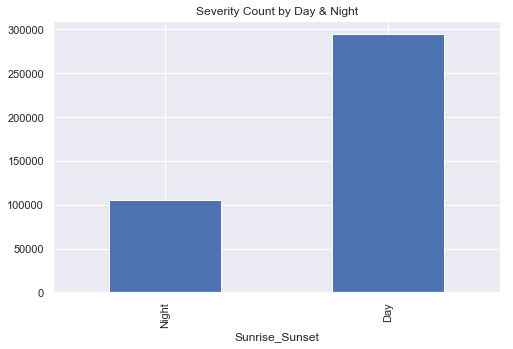

In [44]:
# Are most accidents happening by Day or Night?
na.groupby("Sunrise_Sunset")["Severity"].count().sort_values().plot(kind='bar')
plt.title('Severity Count by Day & Night')

Text(0.5, 1.0, 'Number of Accidents by Time_of_Day')

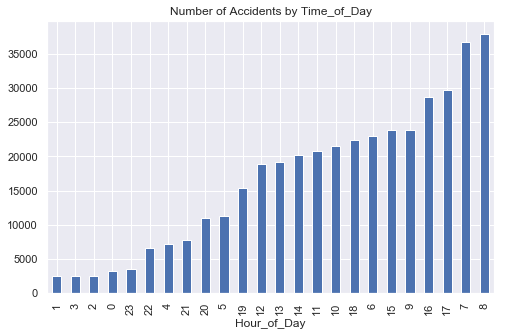

In [41]:
# Number of accidents by Hour of Day
na.groupby("Hour_of_Day")["Severity"].count().sort_values().plot('bar')
plt.title('Number of Accidents by Time_of_Day')

In [12]:
na['Weather_Condition'].nunique()

97

Text(0.5, 1.0, 'Top 10 Weather Conditions Affecting Number of Accidents ')

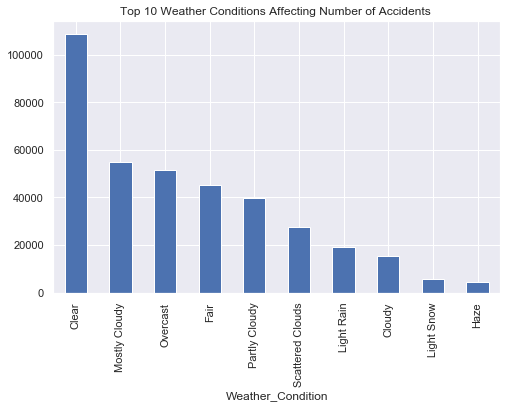

In [47]:
# total number of accidents according to Weather conditions
na.groupby('Weather_Condition').Severity.count().sort_values(ascending=False)\
.head(10).plot('bar')
plt.title('Top 10 Weather Conditions Affecting Number of Accidents ')

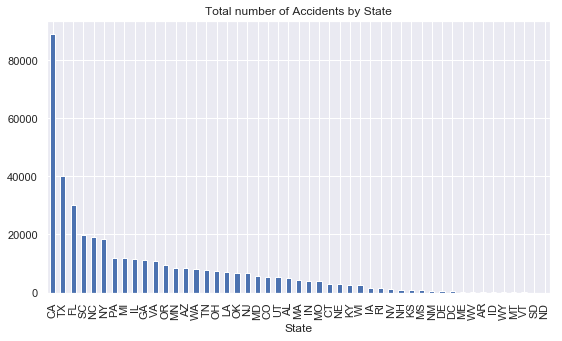

In [54]:
na.groupby('State').Severity.count().sort_values(ascending=False) \
.plot(kind='bar', figsize=(9,5),title="Total number of Accidents by State")


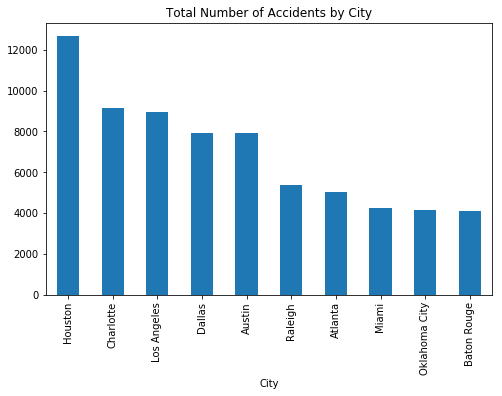

In [20]:
na.groupby('City').Severity.count().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(8,5),title="Total Number of Accidents by City")

In [51]:
# States with the highest count of most severe accidents
four = na[(na['Severity']== 4) & (na['State'])]
#severity_by_state = na.groupby(['Severity', 'State']).Severity.sum().sort_values(ascending=False)


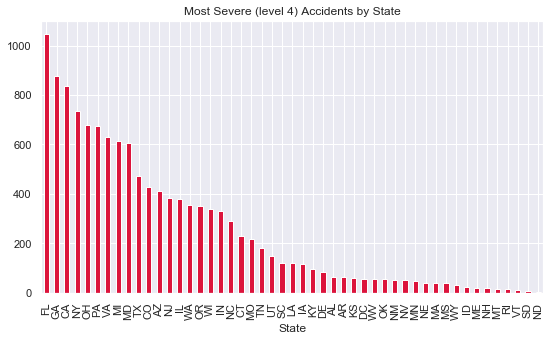

In [57]:
# Top States with most severe (4) accidents
f = four.groupby('State').Severity.count().sort_values(ascending=False)
f.to_frame()

f.plot(kind='bar', color='crimson', figsize=(9,5),title="Most Severe (level 4) Accidents by State")

In [7]:
# Cities with the highest count of most severe accidents
four_city = na[(na['Severity']== 4) & (na['City'])]

In [8]:
f_city = four_city.groupby('City').Severity.count().sort_values(ascending=False).head(20)
f_city.to_frame()

,Severity
City,
Miami,223
Atlanta,190
Houston,114
Columbus,106
Orlando,102
Chicago,101
Seattle,93
Kansas City,84
Phoenix,82


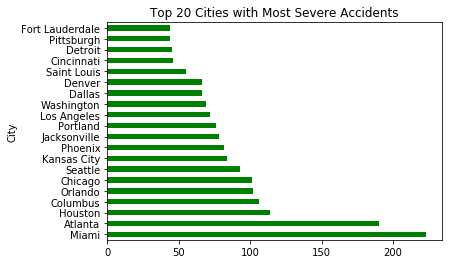

In [9]:
f_city.plot(kind='barh', color='green', title="Top 20 Cities with Most Severe Accidents")

In [58]:
#na[['Start_Time', 'End_Time','Timezone', 'Weather_Timestamp']].head(5)

## Pairplots of weather variables:

In [33]:
p1 = ['Severity', 'Distance(mi)', 'Temperature_filled_mean', 'Wind_Chill_predicted_filled', 'Humidity_filled_mean']
p2 = ['Severity', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed_filled_median', 'Precipitation_filled']

Text(0.33, 1.02, 'Pairplot 1')

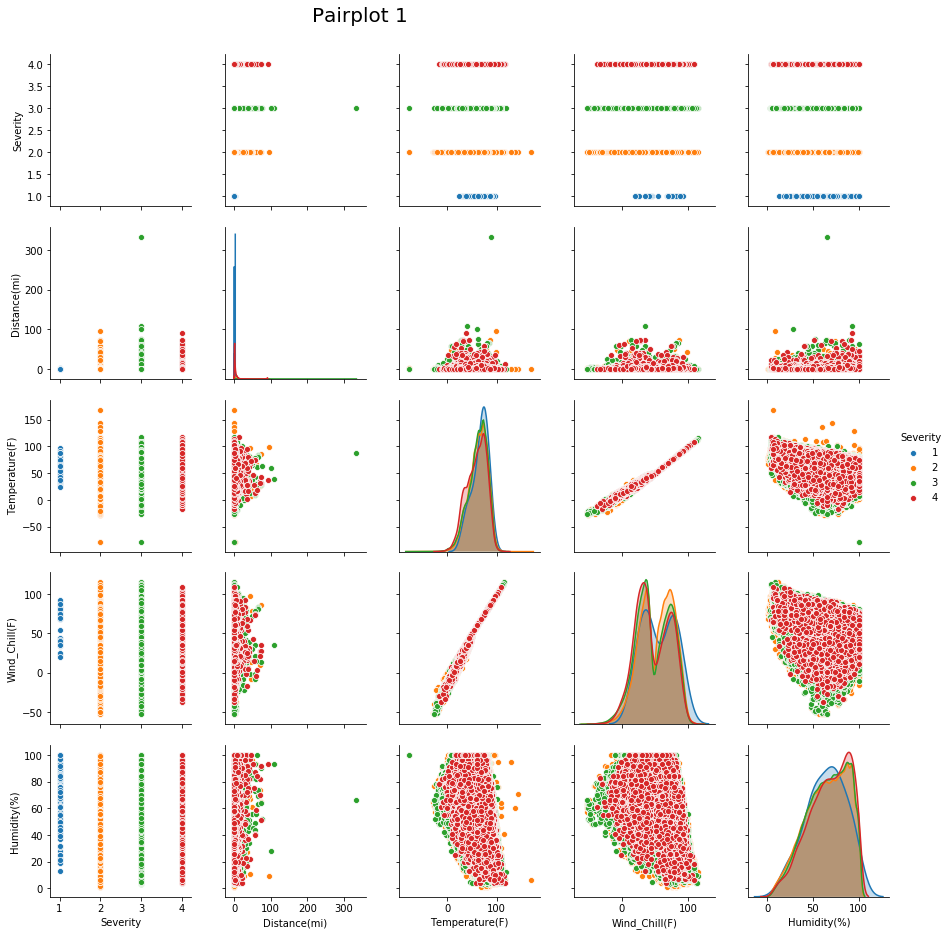

In [26]:
sns.pairplot(na, vars=p1, hue='Severity').fig.text(0.33, 1.02,'Pairplot 1', fontsize=20)
#p.fig.text(0.33, 1.02,'Above the plot', fontsize=20)

Text(0.33, 1.02, 'Pairplot 2')

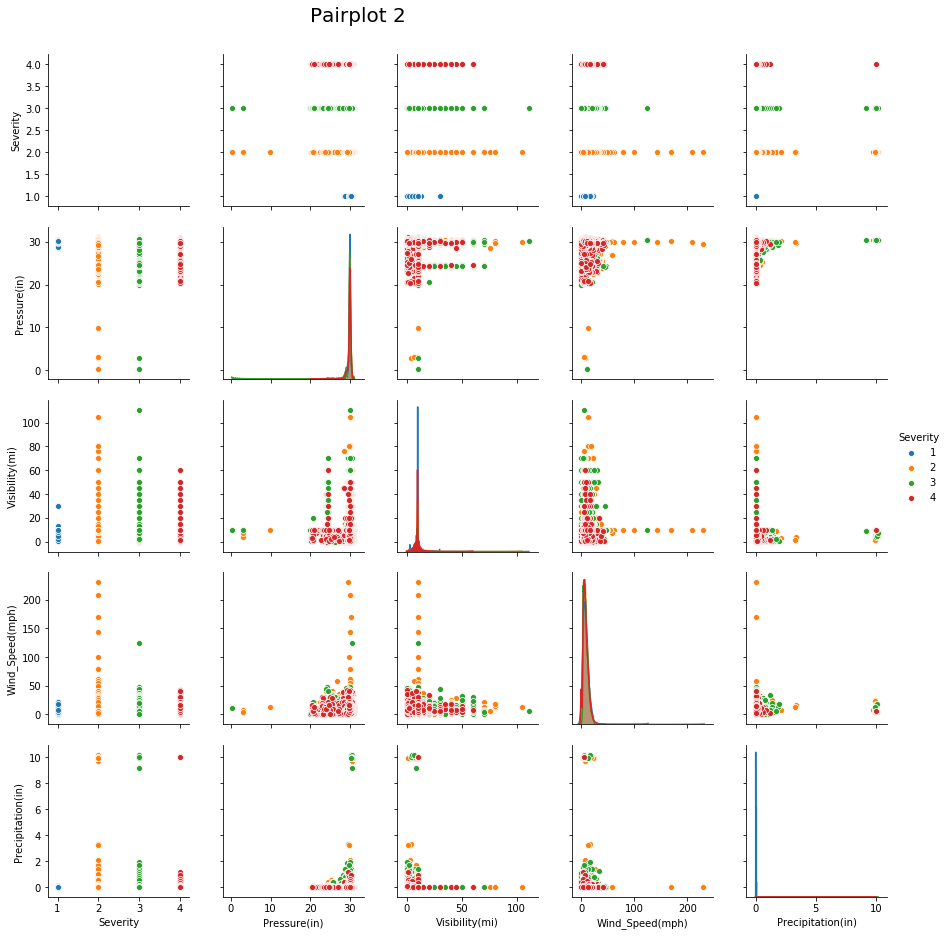

In [27]:
sns.pairplot(na, vars=p2, hue='Severity').fig.text(0.33, 1.02,'Pairplot 2', fontsize=20)

## Accidents Trend over Time

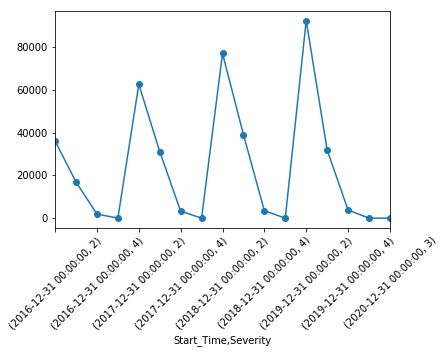

In [24]:
na.resample('Y', on='Start_Time')['Severity'].value_counts().plot(rot=45, marker='o')

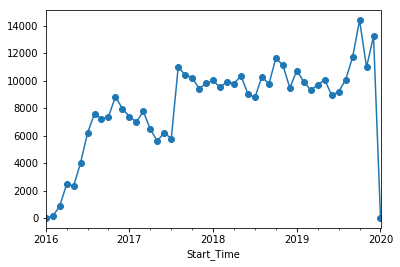

In [26]:
na.resample('M', on='Start_Time')['Severity'].count().plot(marker='o')


## Effect of Traffic Signals/Junctions/Stops etc. on Accidents

C:\Users\Toshiba\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


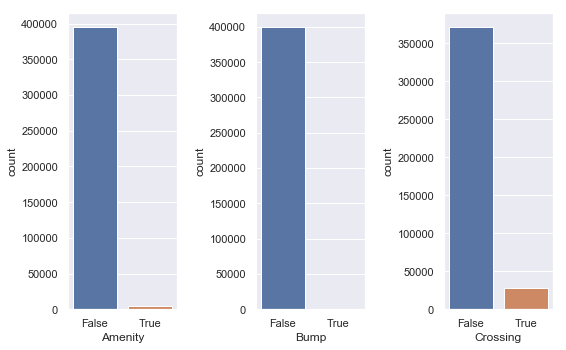

In [31]:
# 
fig, ax =plt.subplots(1,3)

sns.countplot(na['Amenity'], ax=ax[0])
sns.countplot(na['Bump'], ax=ax[1])
sns.countplot(na['Crossing'], ax=ax[2])

plt.tight_layout(pad=1.0)
fig.show()

C:\Users\Toshiba\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


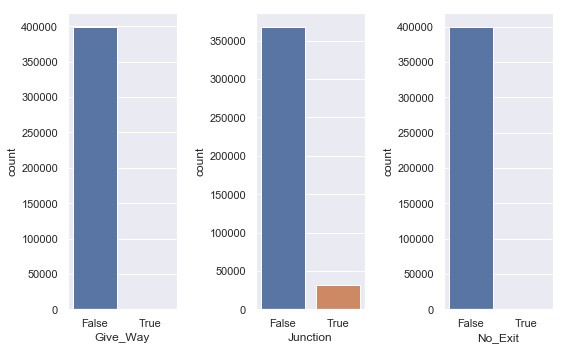

In [28]:
#from pylab import rcParams
#rcParams['figure.figsize'] = 8,5

#sns.set(style="darkgrid")
fig, ax =plt.subplots(1,3)
sns.countplot(na['Give_Way'], ax=ax[0])
sns.countplot(na['Junction'], ax=ax[1])
sns.countplot(na['No_Exit'], ax=ax[2])

plt.tight_layout(pad=1.0)
fig.show()

C:\Users\Toshiba\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


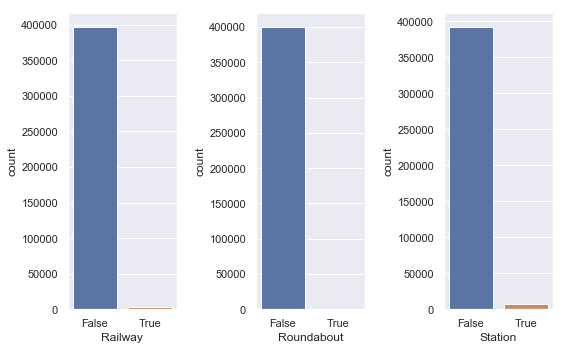

In [29]:
fig, ax =plt.subplots(1,3)

sns.countplot(na['Railway'], ax=ax[0])
sns.countplot(na['Roundabout'], ax=ax[1])
sns.countplot(na['Station'], ax=ax[2])

plt.tight_layout(pad=1.0)
fig.show()

C:\Users\Toshiba\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


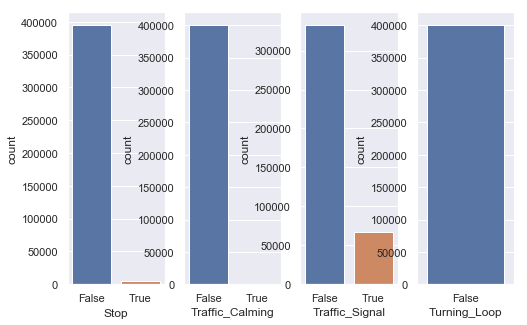

In [30]:
fig, ax =plt.subplots(1,4)
sns.countplot(na['Stop'], ax=ax[0])
sns.countplot(na['Traffic_Calming'], ax=ax[1])
sns.countplot(na['Traffic_Signal'], ax=ax[2])
sns.countplot(na['Turning_Loop'], ax=ax[3])

fig.show()